In [122]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [123]:
wellcome = pd.read_csv('Wellcome Challenge.csv', encoding = 'latin1')

In [124]:
wellcome.head()

,PMID/PMCID,Publisher,Journal title,Article title,COST (£) charged to Wellcome (inc VAT when charged)
0,NaN,CUP,Psychological Medicine,Reduced parahippocampal cortical thickness in ...,£0.00
1,PMC3679557,ACS,Biomacromolecules,Structural characterization of a Model Gram-ne...,£2381.04
2,23043264 PMC3506128,ACS,J Med Chem,"Fumaroylamino-4,5-epoxymorphinans and related ...",£642.56
3,23438330 PMC3646402,ACS,J Med Chem,Orvinols with mixed kappa/mu opioid receptor a...,£669.64
4,23438216 PMC3601604,ACS,J Org Chem,Regioselective opening of myo-inositol orthoes...,£685.88


In [125]:
wellcome.isnull().sum()

PMID/PMCID                                             199
Publisher                                                0
Journal title                                            1
Article title                                            0
COST (£) charged to Wellcome (inc VAT when charged)      0
dtype: int64

In [126]:
wellcome = wellcome.dropna()

In [127]:
wellcome.head()

,PMID/PMCID,Publisher,Journal title,Article title,COST (£) charged to Wellcome (inc VAT when charged)
1,PMC3679557,ACS,Biomacromolecules,Structural characterization of a Model Gram-ne...,£2381.04
2,23043264 PMC3506128,ACS,J Med Chem,"Fumaroylamino-4,5-epoxymorphinans and related ...",£642.56
3,23438330 PMC3646402,ACS,J Med Chem,Orvinols with mixed kappa/mu opioid receptor a...,£669.64
4,23438216 PMC3601604,ACS,J Org Chem,Regioselective opening of myo-inositol orthoes...,£685.88
5,PMC3579457,ACS,Journal of Medicinal Chemistry,Comparative Structural and Functional Studies ...,£2392.20


In [128]:
wellcome['Journal cleaned'] = wellcome['Journal title'].str.lower().str.strip()

In [129]:
top5 = wellcome['Journal cleaned'].value_counts()[:5]

In [130]:
wellcome = wellcome.rename(columns={'COST (£) charged to Wellcome (inc VAT when charged)':'Cost'})

In [131]:
cost_list = list(wellcome['Cost'])

In [132]:
cost_nums = []
for i in cost_list:
    n = i.replace('£','')
    m = n.replace('$', '')
    cost_nums.append(float(m))

In [133]:
wellcome['Cost cleaned'] = wellcome['Cost'].apply(lambda x: float(x.replace('£','').replace('$','')))

In [139]:
wellcome.loc[wellcome['Cost cleaned']>10000]

,PMID/PMCID,Publisher,Journal title,Article title,Cost,Journal cleaned,Cost cleaned
149,PMC3234811,ASBMB,Journal of Biological Chemistry,Picomolar nitric oxide signals from central ne...,£999999.00,journal of biological chemistry,999999.0
227,3708772,BioMed Central,BMC Genomics.,"Phenotypic, genomic, and transcriptional chara...",£999999.00,bmc genomics.,999999.0
277,PMC3668259,BMC,Trials,Community resource centres to improve the heal...,£999999.00,trials,999999.0
358,PMC3219211,Cambridge University Press,Expert Reviews in Molecular Medicine,Pharmacological targets in the ubiquitin syste...,£999999.00,expert reviews in molecular medicine,999999.0
404,PMC3533396,Company of Biologists,Journal of Cell Science,PKA isoforms coordinate mRNA fate during nutri...,£999999.00,journal of cell science,999999.0
491,PMCID: PMC3464430,Elsevier,Cell,piRNAs can trigger a multigenerational epigene...,£999999.00,cell,999999.0
560,PMC3632754,Elsevier,Experimental Cell Research,Perturbation of invadolysin disrupts cell migr...,£999999.00,experimental cell research,999999.0
630,Epub ahead of print April 2013 - print in press,Elsevier,Journal of paediatric Urology,Persistent unexplained congenital clitoromegal...,£999999.00,journal of paediatric urology,999999.0
660,PMID:23291342 PMC3581773,Elsevier,Molecluar & Cellular Endocrinology,Periconceptional changes in maternal exposure ...,£999999.00,molecluar & cellular endocrinology,999999.0
669,PMC3594749,Elsevier,Molecular Cell,Bax Exists in a Dynamic Equilibrium between th...,£999999.00,molecular cell,999999.0


In [141]:
wellcome = wellcome[~(wellcome['Cost cleaned'] > 10000)]

In [157]:
type(wellcome)

pandas.core.frame.DataFrame

In [144]:
print(np.mean(new_cost_nums))
print(np.median(new_cost_nums))
print(np.std(new_cost_nums))
print(len(new_cost_nums))

1818.5328473
1834.77
760.224024177
1886


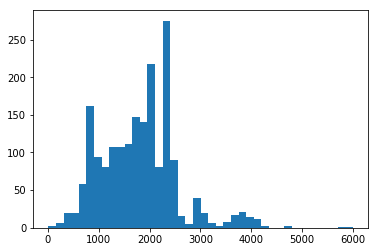

In [145]:
plt.hist(new_cost_nums, bins=40)
plt.show()

In [146]:
jc = pd.Series(wellcome['Journal cleaned'])

In [147]:
jc.drop_duplicates().sort_values()

439                    academy of nutrition and dietetics
8                                    acs chemical biology
22                              acs chemical neuroscience
23                                               acs nano
927     acta crystallographica section d,  biological ...
920     acta crystallographica section d: biological c...
928     acta crystallographica section f: structural b...
921                     acta crystallographica, section d
922                                acta crystallography d
923                                                acta d
1711                           acta dermato venereologica
1716                                   acta diabetologica
924                                                acta f
1717                                     acta neuropathol
1719                                acta neuropathologica
2051                                  acta opthalmologica
1871                                         acta physiol
1872          

In [148]:
wellcome.head()

,PMID/PMCID,Publisher,Journal title,Article title,Cost,Journal cleaned,Cost cleaned
1,PMC3679557,ACS,Biomacromolecules,Structural characterization of a Model Gram-ne...,£2381.04,biomacromolecules,2381.04
2,23043264 PMC3506128,ACS,J Med Chem,"Fumaroylamino-4,5-epoxymorphinans and related ...",£642.56,j med chem,642.56
3,23438330 PMC3646402,ACS,J Med Chem,Orvinols with mixed kappa/mu opioid receptor a...,£669.64,j med chem,669.64
4,23438216 PMC3601604,ACS,J Org Chem,Regioselective opening of myo-inositol orthoes...,£685.88,j org chem,685.88
5,PMC3579457,ACS,Journal of Medicinal Chemistry,Comparative Structural and Functional Studies ...,£2392.20,journal of medicinal chemistry,2392.20


In [149]:
mean_per_journal = wellcome.groupby('Journal cleaned')['Cost cleaned'].mean()
median_per_journal = wellcome.groupby('Journal cleaned')['Cost cleaned'].median()
stdev_per_journal = wellcome.groupby('Journal cleaned')['Cost cleaned'].std()
count_per_journal = wellcome.groupby('Journal cleaned')['Cost cleaned'].count()

In [150]:
print(mean_per_journal)
print(median_per_journal)
print(stdev_per_journal)

Journal cleaned
academy of nutrition and dietetics                                                         2379.540000
acs chemical biology                                                                       1535.965000
acs chemical neuroscience                                                                  1186.800000
acs nano                                                                                    668.140000
acta crystallographica section d,  biological crystallography                               771.420000
acta crystallographica section d: biological crystallography                                773.740000
acta crystallographica section f: structural biology and crystallization communications     796.635000
acta crystallographica, section d                                                           757.180000
acta crystallography d                                                                      774.190000
acta d                                                   

In [151]:
stats_dict = {'Cost cleaned':{
    'Count':'count', 
    'Mean':'mean', 
    'Median':'median', 
    'Standard Deviation': 'std'}}

In [152]:
second_way = wellcome.groupby('Journal cleaned').agg(stats_dict).reset_index()

In [153]:
second_way.head()

Journal cleaned Cost cleaned            \
                                                            Count    Median   
0                 academy of nutrition and dietetics            1  2379.540   
1                               acs chemical biology            4  1294.685   
2                          acs chemical neuroscience            1  1186.800   
3                                           acs nano            2   668.140   
4  acta crystallographica section d,  biological ...            1   771.420   

                                
       Mean Standard Deviation  
0  2379.540                NaN  
1  1535.965         500.670917  
2  1186.800                NaN  
3   668.140          35.708892  
4   771.420                NaN

In [154]:
top5_list = ['plos one', 'journal of biological chemistry', 'neuroimage', 'nucleic acids research', 'plos pathogens']

In [155]:
second_way.columns = second_way.columns.droplevel(0)
    

In [156]:
second_way.sort_values('Count', ascending = False)[:5]

,,Count,Median,Mean,Standard Deviation
672,plos one,180,897.090,935.728778,202.708175
452,journal of biological chemistry,51,1314.530,1426.778431,415.404372
615,neuroimage,28,2335.040,2230.718571,257.809151
633,nucleic acids research,25,852.000,1160.880000,447.826633
686,proceedings of the national academy of sciences,22,742.045,793.012273,464.269919
